<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Class-distribution" data-toc-modified-id="Class-distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Class distribution</a></span></li><li><span><a href="#Text-Preparation-for-Spacy" data-toc-modified-id="Text-Preparation-for-Spacy-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Text Preparation for Spacy</a></span></li><li><span><a href="#Classifying-text-into-categories-using-Spacy" data-toc-modified-id="Classifying-text-into-categories-using-Spacy-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Classifying text into categories using Spacy</a></span></li><li><span><a href="#Named-Entity-Recognition" data-toc-modified-id="Named-Entity-Recognition-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Named Entity Recognition</a></span></li><li><span><a href="#Chunking" data-toc-modified-id="Chunking-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Chunking</a></span></li><li><span><a href="#Dependency-Parsing" data-toc-modified-id="Dependency-Parsing-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Dependency Parsing</a></span></li><li><span><a href="#Verb-Phrase-Detection" data-toc-modified-id="Verb-Phrase-Detection-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Verb Phrase Detection</a></span></li><li><span><a href="#Rule-Based-Matching-Using-spaCy" data-toc-modified-id="Rule-Based-Matching-Using-spaCy-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Rule-Based Matching Using spaCy</a></span></li><li><span><a href="#Word-vectors-and-similarity" data-toc-modified-id="Word-vectors-and-similarity-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Word vectors and similarity</a></span></li><li><span><a href="#Pipeline-components" data-toc-modified-id="Pipeline-components-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Pipeline components</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Introduction
[Data Description](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data)


You are provided with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are:
```
toxic
severe_toxic
obscene
threat
insult
identity_hate
```
You must create a model which predicts a probability of each type of toxicity for each comment.


# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('ggplot') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
SEED=100
np.random.seed(SEED)

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
from pandas.api.types import CategoricalDtype
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 500)

import IPython
from IPython.display import display, HTML, Image, Markdown

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.4'), ('pandas', '0.25.3'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.2')]


In [0]:
import re
import string # string.punctuation
import string
from string import digits

In [3]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [49]:
ENV_BHISHAN = None

try:
    import bhishan
    ENV_BHISHAN = True
    print("Environment: Bhishan's Laptop")
except:
    pass


import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    # load google drive
    # from google.colab import drive
    # drive.mount('/content/drive')
    # dat_dir = 'drive/My Drive/Colab Notebooks/data/' 
    # sys.path.append(dat_dir)
    
    # pip install
    #!pip install pyldavis
    #!pip install hyperopt
    # !pip install catboost
    #!pip install shap
    #!pip install eli5
    #!pip install lime
    # !pip install category_encoders # TargetEncoder
    # !pip install loguru

    # nlp
    !pip install textacy
    !python -m spacy download en_core_web_sm # nlp = spacy.load("en_core_web_sm")

    # update modules
    # !pip install -U pandas
    # !pip install -U scikit-learn
    # !pip install -U tqdm # tqdm needs restart run time.

    # print
    print('Environment: Google Colaboratory.')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
Environment: Google Colaboratory.


In [0]:
import scipy

In [0]:
# pipeline
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, ClassifierMixin

In [0]:
# text features
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# classifiers
from sklearn.linear_model import LogisticRegression


In [0]:
# model selection
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Useful Scripts

In [0]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

# Load the Data

In [11]:
ifile1_train = '../data/raw/train.csv'
ifile2_train = 'https://github.com/bhishanpdl/Project_Toxic_Comments/blob/master/data/raw/train.csv?raw=true'

ifile1_test = '../data/raw/test.csv'
ifile2_test = 'https://github.com/bhishanpdl/Project_Toxic_Comments/blob/master/data/raw/test.csv?raw=true'

if ENV_BHISHAN:
    df_raw_train = pd.read_csv(ifile1_train)
    df_raw_test = pd.read_csv(ifile1_test)


if ENV_COLAB:
    df_raw_train = pd.read_csv(ifile2_train)
    df_raw_test = pd.read_csv(ifile2_test)
    pass


df_train = df_raw_train.copy()
df_test = df_raw_test.copy()

print(df_train.shape)
df_train.head()

(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess t...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [12]:
print(df_test.shape)
df_test.head()

(153164, 2)


,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [13]:
df_train['clean'] = df_train.loc[:,'toxic':'identity_hate'].sum(axis=1) == 0

print(df_train['clean'].sum())

df_train.head(2)

143346


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,True
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,True


# Class distribution

In [14]:
ser_sum = df_train.iloc[:,2:].sum(axis=0)
ser_sum

toxic             15294.0
severe_toxic       1595.0
obscene            8449.0
threat              478.0
insult             7877.0
identity_hate      1405.0
clean            143346.0
dtype: float64

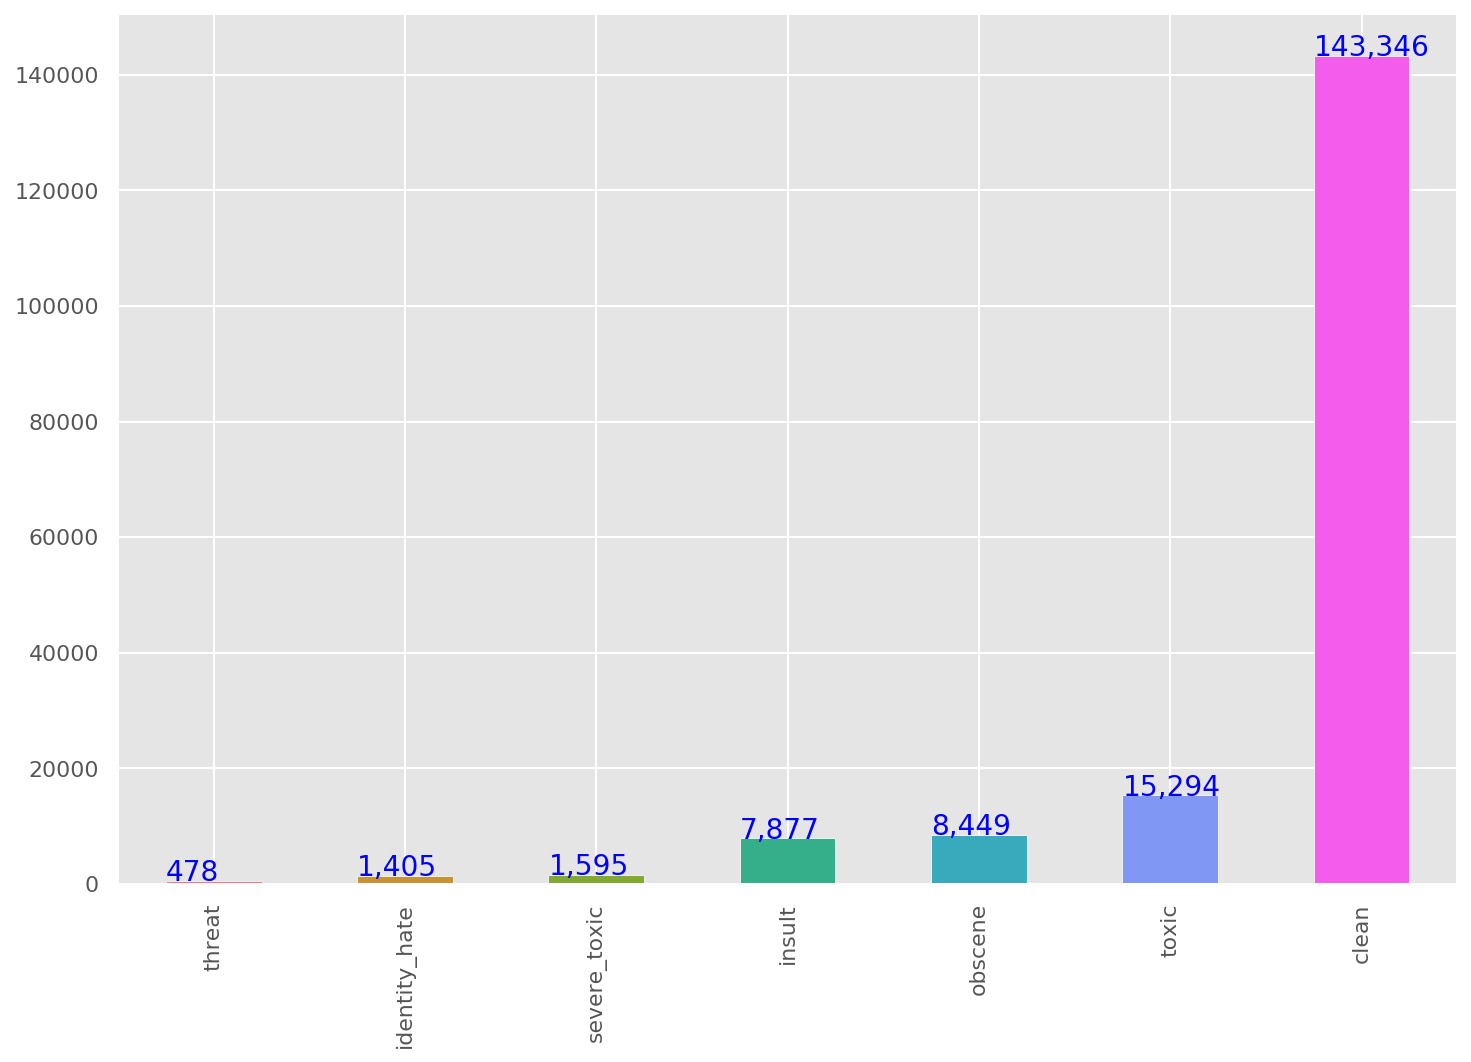

In [15]:
ax = ser_sum.sort_values().plot.bar(color=sns.color_palette('husl',len(ser_sum)))

for p in ax.patches:
    x,y = p.get_x(), p.get_height()
    ax.text(x,y,f'{y:,.0f}',fontsize=14,color='blue')

# Text Preparation for Spacy

In [0]:
df_train['text'] = df_train['comment_text'].apply(lambda x: x.replace('\n', ' '))

In [0]:
cats = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

lst_train_prepared = []

def format_text_spacy(text):
    return (text.text, {'cats': {cat: text[cat] for cat in cats}})
    
for i in range(0,len(df_train)):
    text = df_train.iloc[i]
    lst_train_prepared.append(format_text_spacy(text))

In [0]:
# lst_train_prepared[0:3]

# Classifying text into categories using Spacy

In [0]:
import random
import spacy
import time
from spacy.util import minibatch, compounding

In [31]:
time_start = time.time()


# nlp = spacy.load('en_core_web_lg')
nlp = spacy.load('en')

# creat textcat
textcat = nlp.create_pipe('textcat')

# add this to pipe
nlp.add_pipe(textcat, last=True)

# add label
for cat in cats:
    textcat.add_label(cat)

# other pipes
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']


# train only textcat
with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    for i in range(1):
        losses = {}
        batches = minibatch(lst_train_prepared[0:10000], size=compounding(4., 32., 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2, losses=losses)

time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

Time taken: 1 min 43 secs


# Named Entity Recognition

In [0]:
from spacy import displacy

In [0]:
doc = nlp(mytext)    

In [36]:
displacy.render(doc, style='ent', jupyter=True)

# Chunking

In [37]:
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.label_, chunk.root.text)

Explanation NP Explanation
the edits NP edits
my username Hardcore Metallica Fan NP Fan
They NP They
vandalisms NP vandalisms
some GAs NP GAs
I NP I
New York Dolls FAC NP FAC
the template NP template
the talk page NP page
I NP I
retired now.89.205.38.27 NP now.89.205.38.27


# Dependency Parsing

In [0]:
# for token in doc:
#     print("{0}/{1} <--{2}-- {3}/{4}".format(
#         token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

In [39]:
from spacy import displacy
 
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})
 

# Verb Phrase Detection

In [0]:
import textacy

In [46]:
pattern = r'(<VERB>?<ADV>*<VERB>+)'
doc = textacy.make_spacy_doc(mytext,lang='en_core_web_sm')

verb_phrases = textacy.extract.pos_regex_matches(doc, pattern)

# Print all Verb Phrase
for chunk in verb_phrases:
    print(chunk.text)


# Extract Noun Phrase to explain what nouns are involved
for chunk in doc.noun_chunks:
    print (chunk)

made
were reverted
were
voted
don't remove
'm retired
Explanation
the edits
my username Hardcore Metallica Fan
They
vandalisms
some GAs
I
New York Dolls FAC
the template
the talk page
I
retired now.89.205.38.27


/usr/local/lib/python3.6/dist-packages/textacy/extract.py:327: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",


# Rule-Based Matching Using spaCy

In [47]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_full_name(nlp_doc):
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    matcher.add('FULL_NAME', None, pattern)
    matches = matcher(nlp_doc)
    for match_id, start, end in matches:
        span = nlp_doc[start:end]
        return span.text

extract_full_name(doc)

'Hardcore Metallica'

# Word vectors and similarity

In [0]:
nlp = spacy.load("en_core_web_sm")

In [51]:
doc1 = nlp("I like cats")
doc2 = nlp("I like dogs")
# Compare 2 documents
doc1.similarity(doc2)
# Compare 2 tokens
doc1[2].similarity(doc2[2])
# Compare tokens and spans
doc1[0].similarity(doc2[1:3])

/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead 

0.05594692

In [54]:
# Vector as a numpy array
doc = nlp("I like cats")
# The L2 norm of the token's vector
doc[2].vector
doc[2].vector_norm

23.784721

# Pipeline components

In [55]:
nlp.pipe_names
# ['tagger', 'parser', 'ner']
nlp.pipeline
# [('tagger', <spacy.pipeline.Tagger>),
# ('parser', <spacy.pipeline.DependencyParser>),
# ('ner', <spacy.pipeline.EntityRecognizer>)]

[('tagger', <spacy.pipeline.pipes.Tagger at 0x7fc9e8770e80>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x7fc9e88502e8>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7fc9e8850348>)]